In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import scvi

In [2]:
um07ona=sc.read_h5ad('uveal-h5/um_07_on.h5')
um07prea=sc.read_h5ad('uveal-h5/um_07_pre.h5')
um08ona=sc.read_h5ad('uveal-h5/um_08_on.h5')
um08posta=sc.read_h5ad('uveal-h5/um_08_post.h5')
um08prea=sc.read_h5ad('uveal-h5/um_08_pre.h5')
um09ona=sc.read_h5ad('uveal-h5/um_09_on.h5')
um09posta=sc.read_h5ad('uveal-h5/um_09_post.h5')
um09prea=sc.read_h5ad('uveal-h5/um_09_pre.h5')
um11ona=sc.read_h5ad('uveal-h5/um_11_on.h5')
um11prea=sc.read_h5ad('uveal-h5/um_11_pre.h5')
um12ona=sc.read_h5ad('uveal-h5/um_12_on.h5')
um12posta=sc.read_h5ad('uveal-h5/um_12_post.h5')
um12prea=sc.read_h5ad('uveal-h5/um_12_pre.h5')
um15ona=sc.read_h5ad('uveal-h5/um_15_on.h5')
um15posta=sc.read_h5ad('uveal-h5/um_15_post.h5')
um15prea=sc.read_h5ad('uveal-h5/um_15_pre.h5')
um16ona=sc.read_h5ad('uveal-h5/um_16_on.h5')
um16posta=sc.read_h5ad('uveal-h5/um_16_post.h5')
um16prea=sc.read_h5ad('uveal-h5/um_16_pre.h5')
uv003posta=sc.read_h5ad('uveal-h5/uv003_post.h5')

In [3]:
um_all=um07ona.concatenate(um07prea,um08ona,um08posta,um08prea,um09ona,um09posta,um09prea,um11ona,um11prea,
                          um12ona,um12posta,um12prea,um15ona,um15posta,um15prea,um16ona,um16posta,um16prea)

In [4]:
#read annotations
annot=pd.read_csv("natgen_annots/um_all_manual_annotation_label.csv")

#drop annotations of sample we are not interested in
drop=[]
for i in range(annot.shape[0]):
    if annot['orig.ident'][i]=='uv003-uvme-snseq-3p-post':
        drop.append(i)
annot=annot.drop(drop)

#collect barcodes of annotations
tes = um_all.to_df().index
df_list=[]
barcode=list(annot['barcode'])
orig=list(annot['orig.ident'])
man=list(annot['manual_annotation_label'])

for i in np.unique(annot['orig.ident']):
    df=pd.DataFrame()
    for j in range(annot.shape[0]):
        if orig[j]==i:
            df[barcode[j]]=[orig[j],man[j]]
    df_list.append(df.T)

#collect barcodes of anndatas
um07on=um07ona.to_df()
um07pre=um07prea.to_df()
um08on=um08ona.to_df()
um08post=um08posta.to_df()
um08pre=um08prea.to_df()
um09on=um09ona.to_df()
um09post=um09posta.to_df()
um09pre=um09prea.to_df()
um11on=um11ona.to_df()
um11pre=um11prea.to_df()
um12on=um12ona.to_df()
um12post=um12posta.to_df()
um12pre=um12prea.to_df()
um15on=um15ona.to_df()
um15post=um15posta.to_df()
um15pre=um15prea.to_df()
um16on=um16ona.to_df()
um16post=um16posta.to_df()
um16pre=um16prea.to_df()
uv003post=uv003posta.to_df()

um=[um07on,um07pre,um08on,um08post,um08pre,um09on,um09post,um09pre,um11on,um11pre,
                          um12on,um12post,um12pre,um15on,um15post,um15pre,um16on,um16post,um16pre]

#match barcodes 
df_filtered=[]
for i in range(len(um)):
    barcodes_um=um[i].index
    barcodes_annot=df_list[i].index
    drop=[]
    for j in range(len(barcodes_annot)):
        if (barcodes_annot[j] in barcodes_um)==False:
            drop.append(barcodes_annot[j])
    #print(drop)
    df_filtered.append(df_list[i].drop(drop))

reordered=pd.concat(df_filtered)

In [14]:
um_all.obs["manual_annotation"]=list(reordered[1])

In [15]:
#normalize + log transform using scanpy

#NORMALIZATION AND LOG TRANSFORM
sc.pp.calculate_qc_metrics(um_all, inplace=True)

# UPDATE OBS WITH USE

# store the current 'total_counts' under original_total_counts, which will not automatically be updated
# by scanpy in subsequent filtering steps
um_all.obs['original_total_counts'] = um_all.obs['total_counts']

# log10 original library size
um_all.obs['log10_original_total_counts'] = np.log10(um_all.obs['original_total_counts'])

# Normalize by median library size
med = np.median(um_all.obs['original_total_counts'])
sc.pp.normalize_per_cell(um_all, counts_per_cell_after = med)

#log transform + 1 and updates adata.X
sc.pp.log1p(um_all)

In [16]:
sc.pp.neighbors(um_all)
sc.tl.umap(um_all)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [18]:
pmap2=[ "#010067","#9E008E","#FFE502","#005F39","#00FF00","#FF937E",
          "#A42400","#001544","#91D0CB","#620E00","#0000FF","#007DB5","#6A826C","#00AE7E","#C28C9F",
          "#BE9970","#008F9C","#5FAD4E","#FF0000","#FF00F6","#FF029D","#683D3B","#FF74A3","#968AE8","#98FF52",
          "#A75740","#01FFFE","#FFEEE8","#FE8900","#BDC6FF","#01D0FF","#BB8800","#7544B1","#A5FFD2","#FFA6FE",
          "#774D00","#7A4782","#263400","#004754","#43002C","#B500FF","#FFB167","#FFDB66","#90FB92","#7E2DD2",
          "#BDD393","#E56FFE","#DEFF74","#00FF78","#009BFF","#006401","#0076FF","#85A900","#00B917","#788231",
          "#00FFC6","#FF6E41","#E85EBE","000000"]

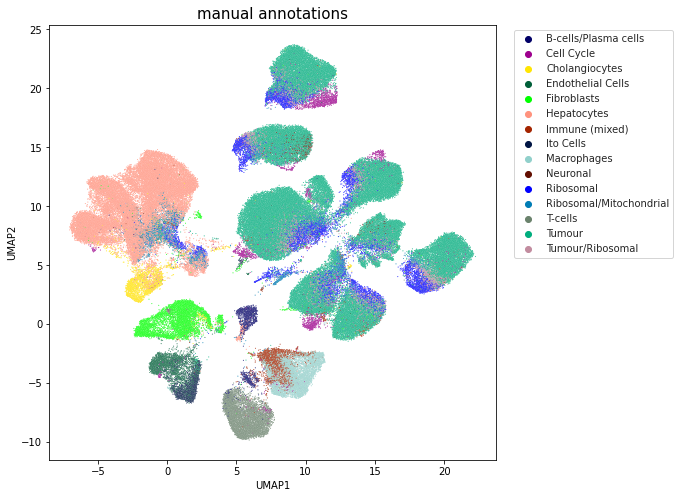

In [19]:
#plot with randomization

randomize=np.arange(len(um_all.obs["orig.ident"]))
np.random.shuffle(randomize)

fig, ax = plt.subplots(figsize=(8,8))
sns.set_style("whitegrid", {'axes.grid' : False})
scatter=sns.scatterplot(x=um_all.obsm["X_umap"][:,0][randomize],y=um_all.obsm["X_umap"][:,1][randomize], hue=um_all.obs["manual_annotation"][randomize],s=1,palette=pmap2[0:len(np.unique(um_all.obs["manual_annotation"]))])
scatter.legend(bbox_to_anchor= (1.03, 1) );
scatter.set_xlabel("UMAP1", fontsize = 10)
scatter.set_ylabel("UMAP2", fontsize = 10)
scatter.set_title("manual annotations", fontsize = 15)
plt.savefig("figures/3a_2.png",format='png',bbox_inches='tight',dpi=500)

In [20]:
#make nice labels for samples
dic={
    'um_07_gk_on_S8_L001':"UMEL_7_2",
    'um_07_gk_pre_S4_L001':"UMEL_7_1",
    'um_08_ar_on_S2_L001':"UMEL_8_2",
    'um_08_ar_post_S3_L001':"UMEL_8_3",
    'um_08_ar_pre_S1_L001':"UMEL_8_1",
    'um_09_mw_on_S6_L001':"UMEL_9_2",
    'um_09_mw_post_S7_L001':"UMEL_9_3", 
    'um_09_mw_pre_S5_L001':"UMEL_9_1",
    'um_11_lc_on_S16_L002':"UMEL_11_2", 
    'um_11_lc_pre_S12_L002':"UMEL_11_1",
    'um_12_ml_on_S10_L002':"UMEL_12_2", 
    'um_12_ml_post_S11_L002':"UMEL_12_3",
    'um_12_ml_pre_S9_L002':"UMEL_12_1", 
    'um_15_lm_on_S14_L002':"UMEL_15_2",
    'um_15_lm_post_S15_L002':"UMEL_15_3", 
    'um_15_lm_pre_S13_L002':"UMEL_15_1",
    'um_16_rs_on_S18_L003':"UMEL_16_2", 
    'um_16_rs_post_S19_L003':"UMEL_16_3",
    'um_16_rs_pre_S17_L003':"UMEL_16_1"
}
label=[dic[i] for i in um_all.obs["orig.ident"]]
um_all.obs["sample"]=label

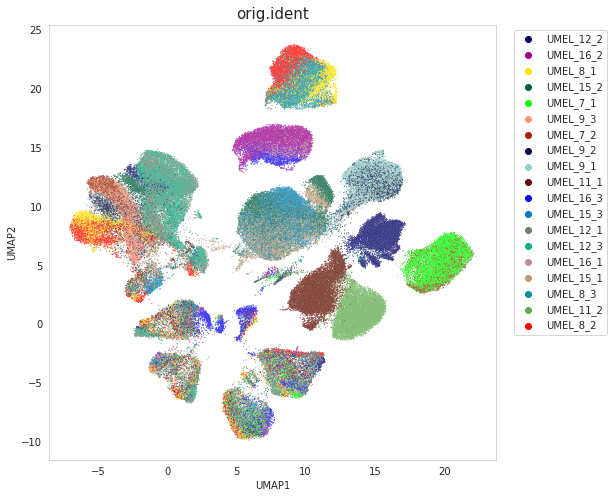

In [22]:
randomize=np.arange(len(um_all.obs["orig.ident"]))
np.random.shuffle(randomize)

fig, ax = plt.subplots(figsize=(8,8))
sns.set_style("whitegrid", {'axes.grid' : False})
scatter=sns.scatterplot(x=um_all.obsm["X_umap"][:,0][randomize],y=um_all.obsm["X_umap"][:,1][randomize], hue=um_all.obs["sample"][randomize],s=1,palette=pmap2[0:len(np.unique(um_all.obs["sample"]))])
scatter.legend(bbox_to_anchor= (1.03, 1) );
scatter.set_xlabel("UMAP1", fontsize = 10)
scatter.set_ylabel("UMAP2", fontsize = 10)
scatter.set_title("orig.ident", fontsize = 15)
plt.savefig("figures/3a_1.png",format='png',bbox_inches='tight',dpi=500)